<a href="https://colab.research.google.com/github/VilasSonawane/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Vilas_Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, **you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments.** The data is vizualized as it becomes easy to analyse data at instant. **The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.**

This could help in **clustering the restaurants into segments**. **Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **Question to be answered during Project**

# 1.Analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations.
# 2..cluster the zomato restaurants into different segments. 
# 3. The customers finding the Best restaurant in their locality and for the company to grow up 
# 4. The Analysis also solve some of the business cases that can directly helpand work on the fields they are currently lagging in.
# 5. Finding Current Buisness problem and Recomendation for Zommatoo To increse its buisness.
# 6. Clustering restarants into segments  
# 7. information around cuisine and costing which can be used in cost vs. benefit analysis
# 8. Sentiment analysis of custmer review
# 9. Identifying the critics in the industry based on the metadata of reviewers.

# **Trends/ Insights to be Explore**
# 1. Top 10 Restaurant costiler, cheapesst, afoordable
# 2. Top 10 Cuisines
# 3. Top 10 in different categories
# 4. Explore the timing columns
# 5. Most famous Restaurant based on user review /ratings
# 6. Most possitive ratings Most negative ratings
# 7. Top 10 Most active customers(Critics) based Review and follower
# 8. Most Populer Restaurant based no of customer visits etc.  

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [33]:
!pip install textblob

In [103]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings('ignore')

In [59]:
# library to clean data
import re 
# Natural Language Tool Kit
import nltk
nltk.download('stopwords')
# to remove stopword
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer 
# for Calculate Sentiment Polarity
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
restolist_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant names and Metadata.csv')

In [13]:
restolist_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [14]:
restolist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [15]:
restolist_df.shape

(105, 6)

In [16]:
restolist_df.drop('Links', axis = 1, inplace = True)

In [17]:
# Let us define a function to convert the string of 'Installs' column to integer
def str_to_int(input_str):
  '''
  This function  converts the string format column elements to integer format
  '''
  result = int(float(input_str.replace(',','')))
  return result

In [18]:
restolist_df.Cost= restolist_df.Cost.apply(str_to_int)

In [19]:
def str_to_list (text):
  return text.split(", ")

In [20]:
restolist_df['Cuisines'] = restolist_df['Cuisines'].apply(str_to_list)

In [21]:
restolist_df.loc[~restolist_df['Collections'].isna(),'Collections'] =restolist_df.loc[~restolist_df['Collections'].isna(),'Collections'].apply(str_to_list)

In [22]:
restolist_df

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaura...","[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
100,IndiBlaze,600,NaN,"[Fast Food, Salad]",11 AM to 11 PM
101,Sweet Basket,200,NaN,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,500,NaN,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM
103,Wich Please,250,NaN,[Fast Food],8am to 12:30AM (Mon-Sun)


In [24]:
restolist_df.head()

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, South ...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beve...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaura...","[Asian, Continental, North Indian, Chinese, Me...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [25]:
review_df = pd.read_csv('/content/drive/MyDrive/Capstone Project on ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS/Zomato Restaurant reviews.csv')

In [26]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [27]:
review_df.shape

(10000, 7)

In [28]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [29]:
review_df.Review.isnull().sum()

45

In [30]:
newreview_df= review_df[~review_df.Review.isnull()]

In [31]:
newreview_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [32]:
newreview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


# **Sentiment Analysis**
## **Sentiment Analysis can help us decipher the mood and emotions of general public and gather insightful information regarding the context.**

In [102]:
# Lets Create Function to Clean Review Text
def clean_review(review):
        '''
        Utility function to clean Review text by removing links, special characters
        using simple regex statements.
        '''
        review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review)
        review = review.lower()
    # split to array(default delimiter is " ")
        review = review.split()
    # in string array at ith row   
        review = [word for word in review if not word in set(stopwords.words('english'))]             
    # rejoin all string array elements
    # to create back into a string
        review = ' '.join(review)   
        return review
  

In [ ]:
# #      # creating PorterStemmer object to
#     # take main stem of each word
#         ps = PorterStemmer()
#     # loop for stemming each word
# review = [ps.stem(word) for word in review
#                 if not word in set(stopwords.words('english'))]

In [99]:
def get_review_sentiment(review):
        '''
        Utility function to classify sentiment of passed Review
        using textblob's sentiment method
        '''
        # create TextBlob object of passed Review
        analysis = TextBlob(clean_review(review))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [95]:
def getSubjectivity(review):
   return TextBlob(clean_review(review)).sentiment.subjectivity

In [96]:
def getPolarity(review):
  return TextBlob(clean_review(review)).sentiment.polarity

In [93]:
# Get Clean Review Column
newreview_df['clean_review'] = newreview_df['Review'].apply(clean_review )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
# Get Sentiment Polarity
newreview_df['Sentiment_Polarity'] = newreview_df['Review'].apply(getPolarity )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# Get Sentiment Subjectivity
newreview_df['Sentiment_Subjectivity'] = newreview_df['Review'].apply(getSubjectivity )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
# Get Sentiment Analysis
newreview_df['Sentiment'] = newreview_df['Review'].apply(get_review_sentiment )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
newreview_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,clean_review,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch c...,0.660000,0.720000,positive
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...,0.708333,0.691667,positive
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...,0.550000,0.675000,positive
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...,0.750000,0.675000,positive
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food good ordered kodi drumsticks basket mutto...,0.560000,0.540000,positive


## **1.Sentiment Polarity lies between [-1,1], -1 defines a negative sentiment, 1 defines a positive sentiment and 0 defines neutral sentiment.**

## **2. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.**


In [133]:
A= newreview_df.Sentiment.value_counts()
A

positive    7624
negative    1835
neutral      496
Name: Sentiment, dtype: int64

In [106]:
import seaborn as sns

# **Overall Customer Sentiment Based On Review**

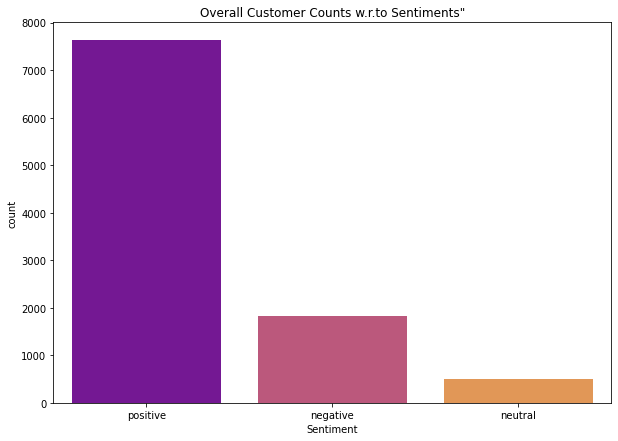

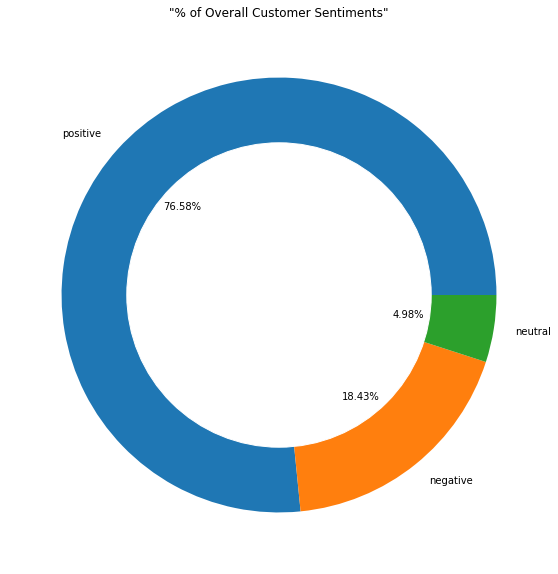

In [153]:
# Overall Customer Sentiment Based On Review
plt.figure(figsize=(10,7))
plt.title('Overall Customer Counts w.r.to Sentiments"')
sns.countplot(data=newreview_df, x="Sentiment", palette="plasma")

#Lets see pie plot of Overall Customer Sentiment about there Experiance @ Zomato Restaurants
plt.figure(figsize=(10,10))
plt.pie( A ,labels=A.index,autopct='%1.2f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('"% of Overall Customer Sentiments"')
plt.show()

In [120]:
newreview_df.Restaurant.value_counts()

Beyond Flavours               100
PourHouse7                    100
Urban Asia - Kitchen & Bar    100
The Indi Grill                100
The Tilt Bar Republic         100
                             ... 
Being Hungry                   99
Olive Garden                   99
Hyderabad Chefs                98
Arena Eleven                   85
American Wild Wings            77
Name: Restaurant, Length: 100, dtype: int64

In [ ]:
df = newreview_df.groupby(by =newreview_df.Restaurant)['Sentiment_Polarity','Sentiment_Subjectivity'].mean().sort_values(by=['Sentiment_Polarity'],ascending = False).reset_index()

## **Top 10 (Most Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

In [156]:
df.rename(columns={'Sentiment_Polarity' : 'Mean_Sentiment_Polarity','Sentiment_Subjectivity' :' Mean_Sentiment_Subjectivity'}, inplace = True)
df

,Restaurant,Mean_Sentiment_Polarity,Mean_Sentiment_Subjectivity
0,AB's - Absolute Barbecues,0.587395,0.715231
1,Flechazo,0.526417,0.661154
2,"3B's - Buddies, Bar & Barbecue",0.518821,0.684991
3,B-Dubs,0.497512,0.644784
4,The Indi Grill,0.482232,0.608736
...,...,...,...
95,Domino's Pizza,0.071351,0.578642
96,KFC,0.062730,0.544871
97,Asian Meal Box,0.053010,0.519008
98,Pakwaan Grand,0.048103,0.591807


Text(0.5, 1.0, 'Top 10 Restaurants in Hyderabad (Based On Customer Review)')

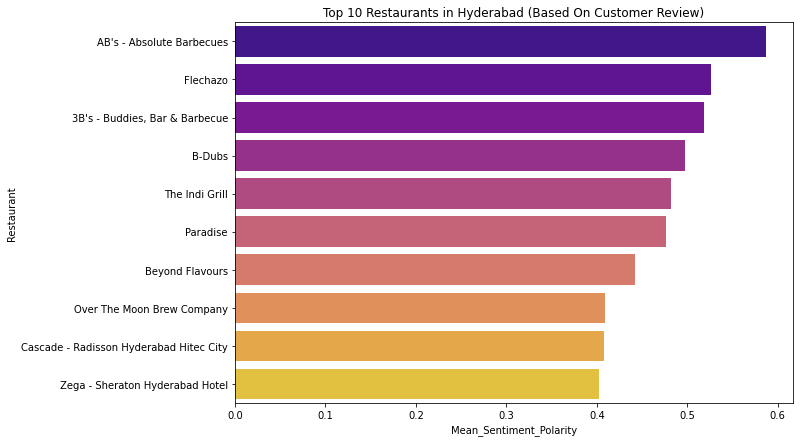

In [157]:
# Top 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
sns.barplot(data= df.head(10), y="Restaurant",x='Mean_Sentiment_Polarity', palette="plasma")
plt.title('Top 10 Restaurants in Hyderabad (Based On Customer Review)')

## **Worst 10 (Least Populer) Restaurants In Hyderabad based on Customer Review (Sentiment)**

Text(0.5, 1.0, ' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

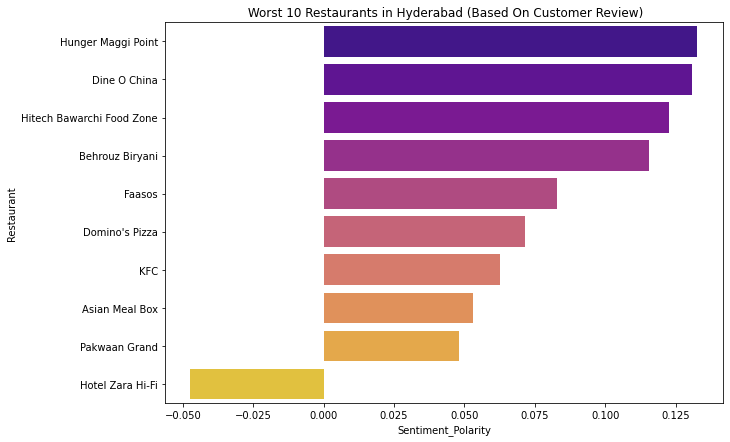

In [128]:
# Worst 10 Restaurants in Hyderabad (Based On Customer Review)
plt.figure(figsize=(10, 7))
sns.barplot(data=df.tail(10), y="Restaurant",x='Sentiment_Polarity', palette="plasma")
plt.title(' Worst 10 Restaurants in Hyderabad (Based On Customer Review)')

## **So Hotel Zara Hi Fi is the one of least populer Hotel in Hyderabad Beacause That is the only Restaurant which has given Overall  Mean Sentiment Polarity -0.050, Means Most of the Customer has given -ve review about The Restaurants.**